## Cleaning Regional Dengue Clusters Data

In [93]:
import pandas as pd
import numpy as np
import glob
import geopandas as gpd
import fiona

fiona.drvsupport.supported_drivers['libkml'] = 'rw' # enable KML support which is disabled by default
fiona.drvsupport.supported_drivers['LIBKML'] = 'rw' # enable KML support which is disabled by default

## Read in Planning Area File

Read in as GeoDataFrame

In [13]:
planning_area = gpd.read_file('../datasets/dengue_cases_regional/planning-boundary-area.kml')

<Axes: >

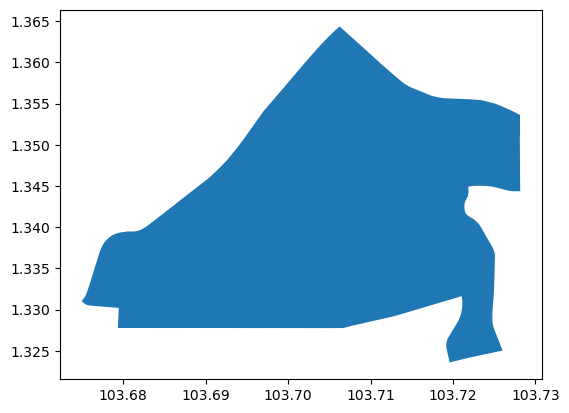

In [23]:
planning_area[planning_area['PLN_AREA_N']=='JURONG WEST'].plot()

## Read in Dengue Clusters Files

Read in each file and append into single file, then convert to GeoDataFrame

In [137]:
dengue_cluster_filelist = glob.glob('../datasets/dengue_cases_regional/*-clusters.csv')

df = []

for file in dengue_cluster_filelist:

    temp = pd.read_csv(file, names=['num_of_cases', 
                                  'street_address', 
                                  'latitude', 
                                  'longitude', 
                                  'cluster_num', 
                                  'recent_cases_in_cluster', 
                                  'total_cases_in_cluster',
                                  'date',
                                  'month'])
    df.append(temp)
    
df = pd.concat(df, ignore_index=True)

### Data Dictionary

| | |
|----|----|
|Number Of Cases|Number of reported dengue cases at this location |
|Street Address|Street address where dengue cases are reported (down to the apartment block level) |
|Latitude|Latitude of the street address |
|Longitude|Longitude of the street address |
|Cluster Number|Every dengue cluster is labelled with a serial number. However, this serial number cannot be used as an unique identifier because (1) the serial number is reused in other snapshots and (2) the serial number will change throughout the cluster's lifetime. |
|Recent Cases In Cluster**|Number of dengue cases with onset in the last 2 weeks |
|Total Cases In Cluster| Total number of dengue cases reported in this cluster |
|Date|Date string in YYMMDD format |
|Month Number|Index number of the month, where 1=January and 12=December |

In [138]:
df.info()
# Observation: no null values, need to convert date to datetime dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56976 entries, 0 to 56975
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   num_of_cases             56976 non-null  int64  
 1   street_address           56976 non-null  object 
 2   latitude                 56976 non-null  float64
 3   longitude                56976 non-null  float64
 4   cluster_num              56976 non-null  int64  
 5   recent_cases_in_cluster  56976 non-null  int64  
 6   total_cases_in_cluster   56976 non-null  int64  
 7   date                     56976 non-null  int64  
 8   month                    56976 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 3.9+ MB


In [139]:
df.describe()

,num_of_cases,latitude,longitude,cluster_num,recent_cases_in_cluster,total_cases_in_cluster,date,month
count,56976.000000,56976.000000,56976.000000,56976.000000,56976.000000,56976.000000,56976.000000,56976.000000
mean,2.583667,1.354812,103.856974,35.301425,6.346462,37.508688,183041.102868,6.426390
std,3.931250,0.038571,0.064542,47.190155,7.331141,54.091489,18159.408902,3.248549
min,1.000000,1.264626,103.614371,1.000000,1.000000,2.000000,150703.000000,1.000000
25%,1.000000,1.323170,103.829118,6.000000,2.000000,4.000000,160613.000000,4.000000
50%,1.000000,1.350902,103.868549,18.000000,4.000000,14.000000,190808.000000,7.000000
75%,3.000000,1.375948,103.903538,47.000000,8.000000,48.000000,200306.000000,9.000000
max,104.000000,1.466968,103.973141,393.000000,92.000000,381.000000,201106.000000,12.000000


In [140]:
# convert date to datetime dtype
df['date'] = pd.to_datetime(df['date'], format='%y%M%d')

In [141]:
# check which ones are sundays
df['date'].dt.dayofweek.value_counts()

1    11524
4    11371
2     9565
6     7893
0     6912
5     6366
3     3345
Name: date, dtype: int64

In [142]:
df[df['date'].dt.dayofweek == 6]['date'].unique()

array(['2015-01-11T00:08:00.000000000', '2015-01-25T00:08:00.000000000',
       '2015-01-04T00:09:00.000000000', '2015-01-18T00:09:00.000000000',
       '2015-01-25T00:09:00.000000000', '2016-01-10T00:02:00.000000000',
       '2016-01-03T00:05:00.000000000', '2016-01-24T00:05:00.000000000',
       '2016-01-10T00:08:00.000000000', '2016-01-03T00:10:00.000000000',
       '2016-01-10T00:10:00.000000000', '2016-01-17T00:10:00.000000000',
       '2016-01-24T00:10:00.000000000', '2016-01-31T00:10:00.000000000',
       '2017-01-08T00:05:00.000000000', '2017-01-15T00:05:00.000000000',
       '2017-01-22T00:05:00.000000000', '2017-01-29T00:05:00.000000000',
       '2017-01-29T00:08:00.000000000', '2018-01-07T00:05:00.000000000',
       '2018-01-14T00:05:00.000000000', '2018-01-21T00:05:00.000000000',
       '2018-01-28T00:05:00.000000000', '2019-01-06T00:05:00.000000000',
       '2019-01-13T00:05:00.000000000', '2019-01-27T00:05:00.000000000',
       '2019-01-06T00:09:00.000000000', '2019-01-13

Observation:

- Data is not aligned to any day of the week. Not possible to align because gaps are irregular

In [143]:
# create geometry column
df['geometry'] = gpd.points_from_xy(x=df['longitude'], y=df['latitude'])

# convert to GeoDataFrame
df = gpd.GeoDataFrame(df)
df.set_crs(epsg=3857, inplace=True)

,num_of_cases,street_address,latitude,longitude,cluster_num,recent_cases_in_cluster,total_cases_in_cluster,date,month,geometry
0,4,bishan street 22 (block 232),1.358286,103.845226,1,24,83,2015-01-03 00:07:00,7,POINT (103.845 1.358)
1,7,bishan street 22 (block 233),1.358639,103.845259,1,24,83,2015-01-03 00:07:00,7,POINT (103.845 1.359)
2,3,bishan street 22 (block 234),1.358390,103.845955,1,24,83,2015-01-03 00:07:00,7,POINT (103.846 1.358)
3,1,bishan street 22 (block 235),1.358719,103.846477,1,24,83,2015-01-03 00:07:00,7,POINT (103.846 1.359)
4,4,bishan street 22 (block 236),1.359041,103.846849,1,24,83,2015-01-03 00:07:00,7,POINT (103.847 1.359)
...,...,...,...,...,...,...,...,...,...,...
56971,1,tampines street 71 (block 715),1.359660,103.937074,131,2,2,2020-01-06 00:11:00,11,POINT (103.937 1.360)
56972,1,tampines street 71 (block 716),1.359482,103.936586,131,2,2,2020-01-06 00:11:00,11,POINT (103.937 1.359)
56973,1,tampines street 82 (block 842b),1.351145,103.936991,132,2,2,2020-01-06 00:11:00,11,POINT (103.937 1.351)
56974,1,tampines street 82 (block 842e),1.351754,103.938303,132,2,2,2020-01-06 00:11:00,11,POINT (103.938 1.352)


In [144]:
jdf = gpd.sjoin(df, planning_area, how='left')

C:\Users\fishe\AppData\Local\Temp\ipykernel_11244\1948961493.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: EPSG:4326

  jdf = gpd.sjoin(df, planning_area, how='left')


In [145]:
jdf.columns

Index(['num_of_cases', 'street_address', 'latitude', 'longitude',
       'cluster_num', 'recent_cases_in_cluster', 'total_cases_in_cluster',
       'date', 'month', 'geometry', 'index_right', 'Name', 'description',
       'timestamp', 'begin', 'end', 'altitudeMode', 'tessellate', 'extrude',
       'visibility', 'drawOrder', 'icon', 'PLN_AREA_N', 'PLN_AREA_C', 'CA_IND',
       'REGION_N', 'REGION_C', 'INC_CRC', 'FMEL_UPD_D', 'snippet'],
      dtype='object')

In [146]:
# extract only needed columns
jdf = jdf[['num_of_cases', 'street_address', 'latitude', 'longitude',
       'cluster_num', 'recent_cases_in_cluster', 'total_cases_in_cluster',
       'date', 'PLN_AREA_N', 'PLN_AREA_C', 'REGION_N', 'REGION_C']]

In [151]:
# convert datetime to just date
jdf['date'] = jdf['date'].dt.date

## Aggregate Data by Date and Regions

In [152]:
dengue_clusters_by_region = jdf.groupby(['date', 'REGION_N']).sum(numeric_only=True)

In [153]:
dengue_clusters_by_region.drop(columns=['latitude', 'longitude', 'cluster_num'], inplace=True)

In [154]:
dengue_clusters_by_region.to_csv('../datasets/dengue_clusters_by_region.csv', index=True)

## Aggregate Data by Date and Planning Areas

In [155]:
dengue_clusters_by_planningarea = jdf.groupby(['date', 'PLN_AREA_N']).sum(numeric_only=True)

In [156]:
dengue_clusters_by_planningarea.drop(columns=['latitude', 'longitude', 'cluster_num'], inplace=True)

In [157]:
dengue_clusters_by_planningarea.to_csv('../datasets/dengue_clusters_by_planningarea.csv', index=False)